In [2]:
import pandas as pd
import nltk
nltk.download('punkt')
from sentida import Sentid
from afinn import Afinn

# Read the data
df = pd.read_csv('data/letters.csv')

In [3]:

afinn = Afinn(language='da')
scores = [afinn.score(text) for text in df.text]
df['sentiment_score'] = scores

df_sentences = pd.read_csv('data/sentences.csv')
scores = [afinn.score(str(sentence)) for sentence in df_sentences.sentence]
df_sentences['afinn_score'] = scores





In [67]:
# full text sentida
sentida_instance = Sentida()
sentida_scores = [sentida_instance.sentida(str(text),output="total") for text in df.text]
df['sentida_score'] = sentida_scores



In [ ]:
sentida_instance = Sentida()
# 12 seconds
sentida_scores = [sentida_instance.sentida(str(sentence),output="total") for sentence in df_sentences.sentence]
df_sentences['sentida_score'] = sentida_scores


In [62]:
# saving sentiment scored sentences
df_sentences.to_csv('data/sentiment_scored_sentences.csv', index=False)

In [65]:
# avg afinn_score per letter in df_sentences
df_agg_sentiment = df_sentences.groupby('letter_id').afinn_score.mean()
df['affin_score_sentenceavg'] = df_agg_sentiment

df_agg_sentida = df_sentences.groupby('letter_id').sentida_score.mean()
df['sentida_score_sentenceavg'] = df_agg_sentida


In [22]:
# top 10 most positive letters
df.sort_values('affin_score_sentenceavg', ascending=False).head(20)

worst_letter = df[df.id == 87].text.iloc[0]
best_letter = df[df.id == 381].text.iloc[0]


#print the most positive letter and 
print(best_letter)

Min egen Pige!  Tak for dit Brev igår og idag. Nu er vi kommen ud af det røde Salon, kan du tro, vi ligger alle i en Skolestue; der er både Pulte og "storker" som Uffe og jeg nok kender. Og der ligger vi en 50 mand i Høvlespåner; men i morgen går det videre igen - ikke langt herfra, og der skal vi få Kvarter for længere tid  men hvem ved, hvad de regner for lang tid. Jeg vil erklære dig alt i den lange lovede Brev, du skal nok få den; men du skal blot vænte lidt. - Og du har 8 dage at bestille, før du får den læst, tror jeg.  Jeg har også fået brev fra Uffe, han mente også, at han kom tilbage igen. Og efter hvad han skriver, at Leutn. har tæmmelig indflydelse på Batl. så tror jeg det også. Ja nu ikke mere i aften.  Slutter med mange kærlige Hilsner og 1000 Kys                                                                                                                                                                                                       din Peter     Feldpostbrief :  

Text(0.5, 1.0, 'Sentida score ')

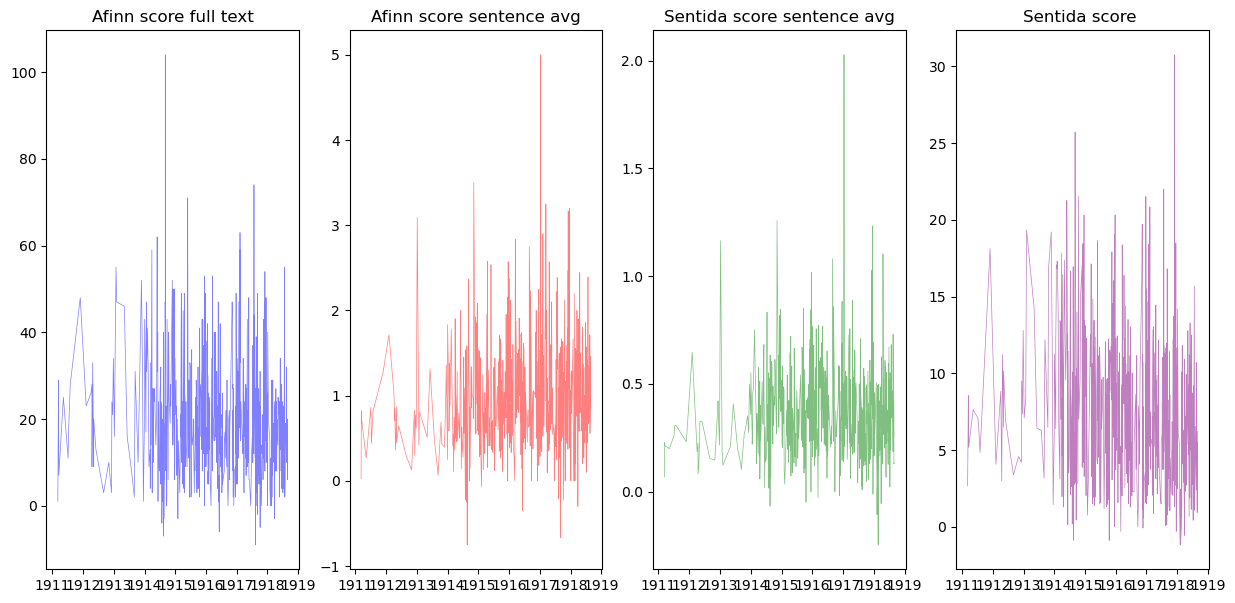

In [69]:
# plot sentiment score over time for date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# convert date to datetime
df['date'] = pd.to_datetime(df['date'])

fig, ax = plt.subplots(1,4,figsize=(15,7))
ax[0].plot(df.date, df.sentiment_score, color='blue', alpha=0.5, linewidth=0.5)
# title on ax 1
ax[0].set_title('Afinn score full text')
ax[1].plot(df.date, df.affin_score_sentenceavg, color='red', alpha=0.5, linewidth=0.5)
ax[1].set_title('Afinn score sentence avg')
ax[2].plot(df.date, df.sentida_score_sentenceavg, color='green', alpha=0.5, linewidth=0.5)
ax[2].set_title('Sentida score sentence avg')
ax[3].plot(df.date, df.sentida_score, color='purple', alpha=0.5, linewidth=0.5)
ax[3].set_title('Sentida score ')



In [75]:
from danlp.models import load_bert_emotion_model
classifier = load_bert_emotion_model()
#from danlp.models import load_bert_tone_model
#classifier = load_bert_tone_model()

You passed along `num_labels=8` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=8` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.


In [76]:
# add bert emotion score per letter
bert_scores = [classifier.predict(str(text)) for text in df.text]
df['bert_emotion_score'] = bert_scores



c:\Users\christian.dalager\AppData\Local\anaconda3\envs\jernkors\lib\site-packages\danlp\models\bert_models.py:180: UserWarning: Maximum length for sequence exceeded, truncation may result in unexpected results. Consider running the model on a shorter sequenze then 512 tokens
  warnings.warn('Maximum length for sequence exceeded, truncation may result in unexpected results. Consider running the model on a shorter sequenze then {} tokens'.format(max_lenght))


In [78]:
df.to_csv('data/sentiment_scored_letters.csv', index=False)